In [1]:
library(tidyr)
library(dplyr)
library(ggplot2)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



# Problema
Quando um classificador em produção apresenta uma piora na performance ou uma nova abordagem é proposta, o analista precisa comparar o classificador atual com o novo para escolher o melhor. Porém, o cenário de fluxos de dados apresenta desafios adicionais ao processamento em lote por não dispor de dados históricos ou esses não serem mais relevantes após mudanças de conceito. Além disso, a comparação precisa ser robusta à presença de desbalanceamento nos dados.

## Dados estacionários balanceados

In [2]:
no_drift_balanced <- read.table(file="../data/evaluation/naive_bayes/no_drift_balanced.csv", header=TRUE, sep=",")
head(no_drift_balanced)

learning.evaluation.instances,evaluation.time..cpu.seconds.,model.cost..RAM.Hours.,classified.instances,classifications.correct..percent.,Kappa.Statistic..percent.,Kappa.Temporal.Statistic..percent.,Kappa.M.Statistic..percent.,Recall.for.class.0..percent.,Recall.for.class.1..percent.,model.training.instances,model.serialized.size..bytes.
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.006256685,0,1,0.00000,0.00000,0.00000,-Inf,0.00000,0.00000,1,0
2,0.011709845,0,2,50.02501,0.00000,50.02501,-Inf,100.00000,0.00000,2,0
3,0.013757240,0,3,33.33332,0.00000,33.33332,-Inf,100.00000,0.00000,3,0
4,0.015108374,0,4,24.98748,-50.06252,24.98748,-Inf,49.97499,0.00000,4,0
5,0.016194453,0,5,40.02002,-15.37275,40.02002,-Inf,49.97499,33.36669,5,0
6,0.017288763,0,6,33.33332,-33.33326,33.33332,-Inf,33.29999,33.36669,6,0


In [3]:
metrics <- no_drift_balanced %>%
            rename(instance = classified.instances, accuracy = classifications.correct..percent., recall_0 = Recall.for.class.0..percent., recall_1 = Recall.for.class.1..percent.) %>%
            filter(4 <= instance & instance <= 1500) %>%
            select(instance, accuracy, recall_0, recall_1) %>%
            gather("metric", "value", accuracy, recall_0, recall_1)
head(metrics)

instance,metric,value
<dbl>,<chr>,<dbl>
4,accuracy,24.98748
5,accuracy,40.02002
6,accuracy,33.33332
7,accuracy,28.55711
8,accuracy,24.97496
9,accuracy,33.34448


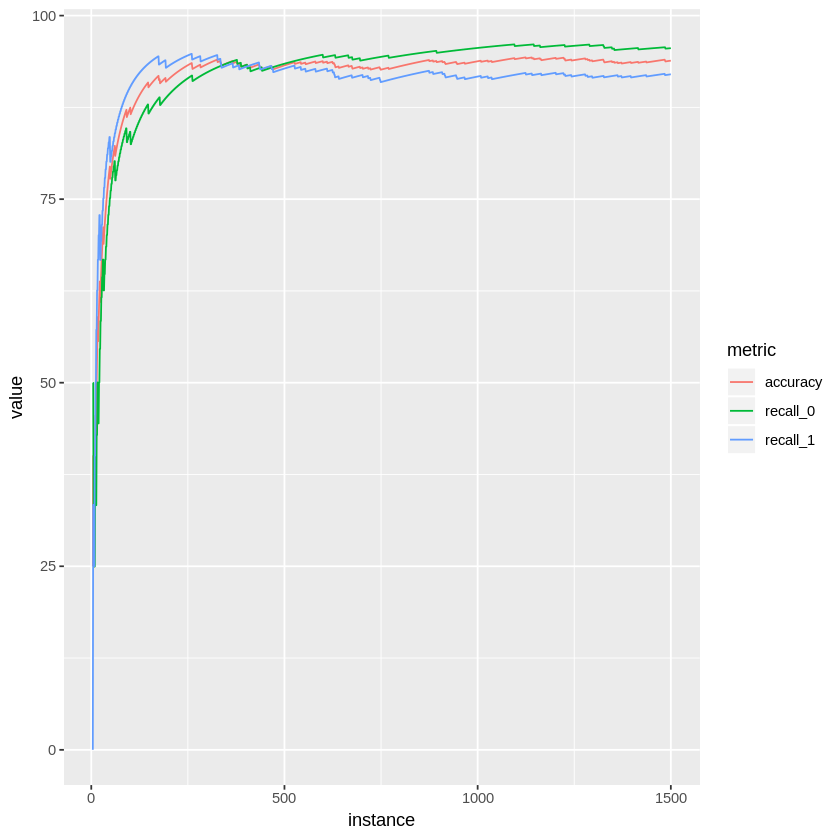

In [4]:
ggplot(data = metrics, mapping = aes(x = instance, y = value, color = metric)) +
    geom_line()

## Dados desbalanceados

## Dados não estacionários

In [5]:
# gráfico da performance baixando (theta1 != theta2)

# Objetivo
Comparar dois classificadores no cenário de fluxos de dados desbalanceados para auxiliar o analista a escolher qual deve ser mantido no ambiente de produção.

# Metodologia
## Descrição
* Treinar e testar dois classificadores de aprendizagem online (Naive Bayes e OzaBagASHT).
* Calcular tabelas de contingência que contam às instâncias corretamente classificadas por cada classificador.
 * Uma tabela por classe corresponde a um recall por classe.
 * Contagem na forma prequencial com fading factor 0,999.
* Aplicar teste de McNemar a partir dessa tabela de contingência.
 * alfa 0,05

## Hipóteses
H0: theta1 = theta2
<br/>
H1: theta1 != theta2

# Resultados

# Conclusão